## groupby()


#### groupby()와 함께 사용하는 집계 메소드

- count : 누락값을 제외한 데이타 수를 반환
- size : 누락값을 포함한 데이타 수를 반환
- sum
- mean
- std
- var
- min
- max
- quantile(q=0.25)
- quantile(q=0.50)
- quantile(q=0.75)
- describe
- first
- last
- nth   : n번째 행 반환
- sem   : 평균의 표준편차 반환

In [1]:
import pandas as pd

df = pd.read_excel('data/고속버스.xlsx') 


In [4]:
df.head()

,차종,선별,출발지,도착지,거리,총운행횟수,총이용인원,이용율
0,우등,88선,광주,울산,327.8,412,7283,63.1
1,고속,88선,광주,울산,327.8,145,3050,46.7
2,우등,88선,광주,울산신복,327.8,164,545,11.9
3,고속,88선,광주,울산신복,327.8,70,311,9.9
4,우등,88선,광주,동대구,219.3,1369,21873,57.1


In [11]:
# 그룹화 - '선별' 단위로 각각의 노선에 대한 총 갯수
tmp1 = df.groupby(df['선별'])['선별'].count()
tmp1.sort_values(ascending=False) # 정렬

선별
호남선    122
경부선    105
구마선     30
영동선     26
경인선     25
남해선     21
88선     18
동해선      4
Name: 선별, dtype: int64

In [9]:
%matplotlib inline

# 한글처리
from matplotlib import rc
rc('font', family='Malgun Gothic')

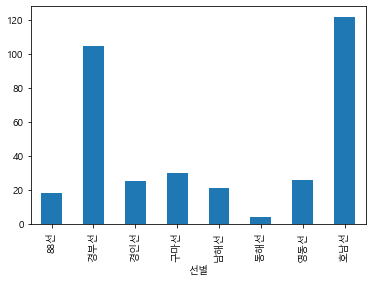

In [14]:
# 노선별 수에 대한 그래프
plt1 = tmp1.plot(kind='bar')

In [16]:
df.head()

,차종,선별,출발지,도착지,거리,총운행횟수,총이용인원,이용율
0,우등,88선,광주,울산,327.8,412,7283,63.1
1,고속,88선,광주,울산,327.8,145,3050,46.7
2,우등,88선,광주,울산신복,327.8,164,545,11.9
3,고속,88선,광주,울산신복,327.8,70,311,9.9
4,우등,88선,광주,동대구,219.3,1369,21873,57.1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A152A75128>,
      dtype=object)

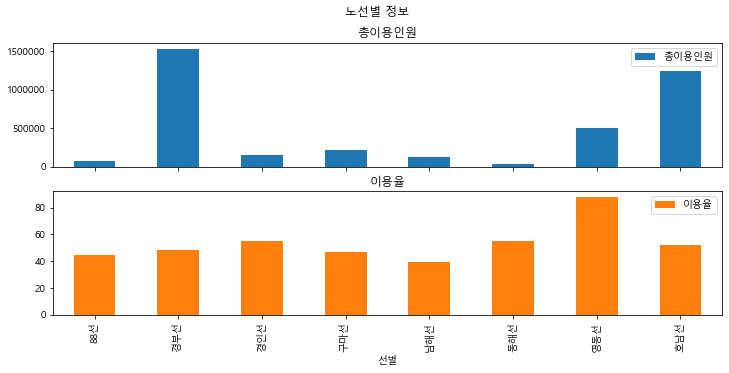

In [69]:
# 차종별, 노선별별 그룹화 작업
# tmp2 = df.groupby([df['차종'],df['선별']])['총이용인원'].count()
# tmp2
# tmp2.plot(kind='bar',figsize=(12, 5),title="노선,차종별 총 이용인원")

agg_format = {'총이용인원':"sum", "이용율" : "mean"}

tmp2 = df.groupby(df['선별'])[['총이용인원','이용율']].agg(agg_format)
tmp2
tmp2.plot(kind='bar',figsize=(12, 5),title="노선별 정보",subplots=True)#y=["총이용인원","이용율"]

In [75]:
# 교차테이블(cross tab) - 엑셀의 Pivot 유사

pivot1 = pd.pivot_table(df,index='선별')
# pivot1

result = pd.crosstab(df['차종'],df['선별'])

result2 = pd.crosstab(df['차종'],df['선별'], margins=True) #margins=True  =>  전체합산 열 추가
result2

선별,88선,경부선,경인선,구마선,남해선,동해선,영동선,호남선,All
차종,,,,,,,,,
고속,7,57,11,14,13,2,14,63,181
우등,11,48,14,16,8,2,12,59,170
All,18,105,25,30,21,4,26,122,351


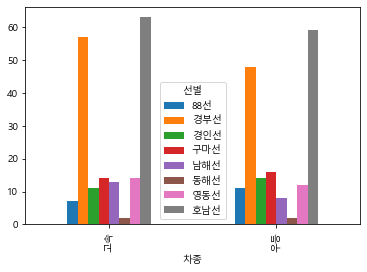

In [73]:
result.plot(kind='bar')

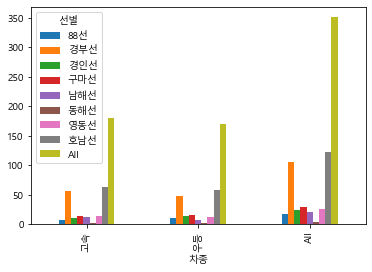

In [74]:
result2.plot(kind='bar')

In [85]:
# 고속과 우등을 합친 전체에서 노선별 그래프 그리기

In [ ]:
# '고속'에서 선별을 그래프 표현 (원그래프)

grouped_1 = df['차종'].groupby('출발지').count()
grouped_1